# Лаба 2

# Решение краевых задач. Методы коллокаций, наименьших квадратов и Гелеркина

## Задание

Получить численное решение кревой задачи

$$y''+(1 + x^2)y=-1, -1 \le x \le 1$$

$$y'' + ( \dfrac {1} {sin(7)} + \dfrac {x^2} {tg(7)})y = \dfrac {-1} {sin(7)}, -1 \le x \le 1$$


## Краевые условия 

$$y(-1)=0$$

$$y(1) = 0$$

## Необходимые импорты

In [15]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plot
from time import time
from math import sin, tan

## Решение
Рассматриваем дифференциальные уравнения второго порядка

$$y''(x) + p(x)y'(x) + q(x)y(x) = f(x)$$

В нашем случае имеем 

$$p(x)=0, q(x)=1 + x^2, f(x)=-1, -1 \leq x \leq 1$$

$$p(x)=0, q(x)=\dfrac {1} {sin(7)} + \dfrac {x^2} {tg(7)}, f(x)=\dfrac {-1} {sin(7)}, -1 \leq x \leq 1$$

In [16]:
k = 7
a = -1
b = 1

i = sp.Symbol('i')
x = sp.Symbol('x')


def q1():
    return 1 + x**2


def q2():
    return 1 / sin(k) + x**2 / tan(k)


def f1():
    return -1


def f2():
    return -1 / sin(k)


def basis():
    return x**i - x**(2 + i)


def basis_second_diff(x, i):
    if i == 0:
        return -2
    elif i == 1:
        return -6 * x
    else:
        return i * (i - 1) * x**(i - 2) - (2 + i) * (i + 1) * x**i 

In [17]:
def show_solution(solution, amount_of_basis_func):
    phi = sp.lambdify(i, basis(), "numpy")
    return sum([solution[i] * phi(i) for i in range(amount_of_basis_func)])

def show_solution_colocation(solution, amount_of_basis_func, amount_of_points):
    phi = sp.lambdify(i, basis(), "numpy")

    result = sum(a * poly for (a, poly) in zip(solution, [phi(j) for j in range(amount_of_basis_func)]))
#     for k in range(amount_of_basis_func):
#         for j in range(amount_of_points):
#             result += solution[k] * phi(j)
    return result

In [18]:
implementation = "numpy"
phi = sp.lambdify([x, i], basis(), implementation)
q1_l = sp.lambdify(x, q1(), implementation)
q2_l = sp.lambdify(x, q2(), implementation)

### Метод коллокаций

In [19]:
def colocation_method(phi, q, f, x, n):
    matrix = np.array([
        [
            basis_second_diff(col_point, j) + q(col_point) * phi(col_point, j) for j in range(n)
        ]
        for col_point in x
    ])
    vector = [f()] * n
    solution = np.linalg.solve(matrix, vector)
    return solution

#### Задание 1

In [20]:
amount_of_basis_func = 5
points = np.linspace(a, b, amount_of_basis_func)

In [21]:
# %%timeit
# colocation_method(phi, q1_l, f1, points, amount_of_points)

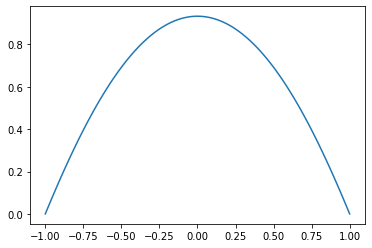

In [22]:
result = colocation_method(phi, q1_l, f1, points, amount_of_basis_func)
new_points = np.linspace(a, b, 100)
beautiful_solution = show_solution_colocation(result, amount_of_basis_func, len(new_points))
# print(beautiful_solution)
y = [beautiful_solution.subs(x, point) for point in new_points]
plot.plot(new_points, y)

In [23]:
beautiful_solution.subs(x, 0)

0.932695592757089

#### Задание 2

In [24]:
amount_of_points = 100
points = np.linspace(a, b, amount_of_points)

In [25]:
%%timeit
colocation_method(phi, q2_l, f2, points, amount_of_points)

57 ms ± 6.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


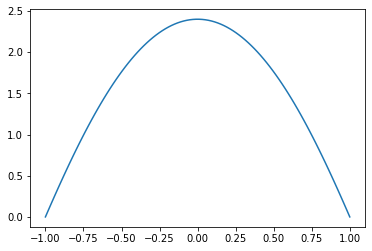

In [26]:
result = colocation_method(phi, q2_l, f2, points, amount_of_points)
beautiful_solution = show_solution(result, amount_of_points)
# print(beautiful_solution)
y = [beautiful_solution.subs(x, point) for point in points]
plot.plot(points, y)

In [27]:
beautiful_solution.subs(x, 0)

2.40199204232917

### Метод наименьших квадратов

In [28]:
def least_square_method(phi, q, f, x, n):
    a_xj = [[basis_second_diff(j, i) + q(j) * phi(j, i) for j in x] for i in range(n)]
    matrix = []
    for a_i in a_xj:
        dsum_ai = []
        for a_k in a_xj:
            dsum_ai.append(sum(i * k for i, k in zip(a_i, a_k)))
        matrix.append(dsum_ai)
    vector = [f() * sum(a_i) for a_i in a_xj]
    solution = np.linalg.solve(matrix, vector)
    return solution

#### Задание 1

In [29]:
amount_of_points = 300
amount_of_basis_func = 100
points = np.linspace(-1, 1, amount_of_points)

In [30]:
%%timeit
least_square_method(phi, q1_l, f1, points, amount_of_basis_func)

1.17 s ± 10.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


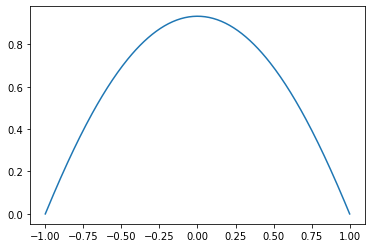

In [31]:
result = least_square_method(phi, q1_l, f1, points, amount_of_basis_func)
beautiful_solution = show_solution(result, amount_of_basis_func)
# print(beautiful_solution)
y = [beautiful_solution.subs(x, point) for point in points]
plot.plot(points, y)

In [32]:
beautiful_solution.subs(x, 0)

0.932053718486132

#### Задание 2

In [33]:
amount_of_points = 300
amount_of_basis_func = 100
points = np.linspace(-1, 1, amount_of_points)

In [34]:
%%timeit
least_square_method(phi, q2_l, f2, points, amount_of_basis_func)

1.2 s ± 14 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


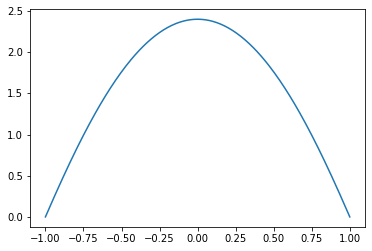

In [35]:
result = least_square_method(phi, q2_l, f2, points, amount_of_basis_func)
beautiful_solution = show_solution(result, amount_of_basis_func)
# print(beautiful_solution)
y = [beautiful_solution.subs(x, point) for point in points]
plot.plot(points, y)

In [36]:
beautiful_solution.subs(x, 0)

2.40199204287984

### Метод Галеркина

In [37]:
def galerkin_method(phi, q, f, n):
    x_amount = n * n
    dx = (b - a) / x_amount
    x = np.linspace(a, b, x_amount)
    basis_second_diffs = np.array([
        basis_second_diff(x, i) for i in range(n)
    ])
    qs = q(x)
    phis = np.array([
        phi(x, i) for i in range(n)
    ])
    matrix = np.array([
        np.array([np.trapz(phis[j] * (basis_second_diffs[i] + qs * phis[i]), dx=dx) for i in range(n)])
        for j in range(n)
    ])
    vector = np.array([np.trapz(f() * phis[i], dx=dx) for i in range(n)])
    solution = np.linalg.solve(matrix, vector)
    return solution

#### Задание 1

In [38]:
amount_of_basis_func = 100

In [39]:
%%timeit
galerkin_method(phi, q1_l, f1, amount_of_basis_func)

1.15 s ± 36.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


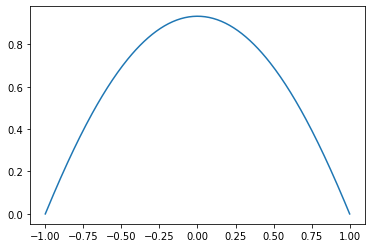

In [40]:
result = galerkin_method(phi, q1_l, f1, amount_of_basis_func)
beautiful_solution = show_solution(result, amount_of_basis_func)
# print(beautiful_solution)
y = [beautiful_solution.subs(x, point) for point in points]
plot.plot(points, y)

In [41]:
beautiful_solution.subs(x, 0)

0.932053718342423

#### Задание 2

In [42]:
amount_of_basis_func = 100

In [43]:
%%timeit
galerkin_method(phi, q2_l, f2, amount_of_basis_func)

1.1 s ± 12.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


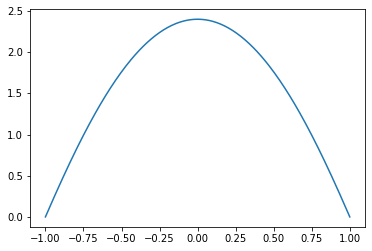

In [44]:
result = galerkin_method(phi, q2_l, f2, amount_of_basis_func)
beautiful_solution = show_solution(result, amount_of_basis_func)
# print(beautiful_solution)
y = [beautiful_solution.subs(x, point) for point in points]
plot.plot(points, y)

In [45]:
beautiful_solution.subs(x, 0)

2.40199204246966